##  Распознавание объекта по форме
### Фрукт 1 - Carambula, Фрукт 2 - Limes, Оператор - Щарра

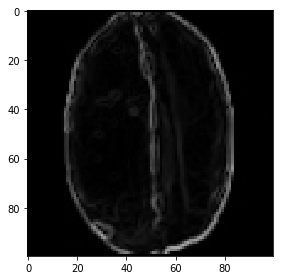

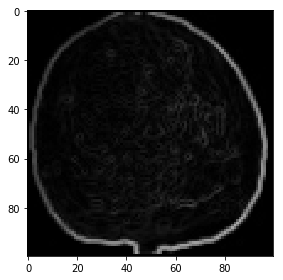

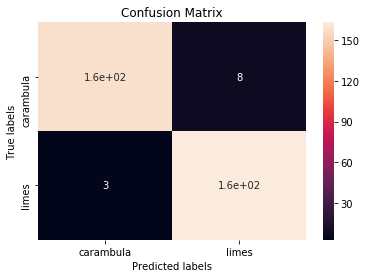

In [2]:
from skimage.filters import scharr
from skimage.io import imread, imshow, show
import numpy as np
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt  

# Прочитать изображение и сделать его серым
carambula = imread(fname="fruits/Training/Carambula/0_100.jpg", as_gray=True)
limes = imread(fname="fruits/Training/Limes/0_100.jpg", as_gray=True)

# Выделение границ оператором Щарра
edges_carambula = scharr(carambula)
# Вывод изображения
imshow(edges_carambula)
show()

# Выделение границ оператором Щарра
edges_limes = scharr(limes)
# Вывод изображения
imshow(edges_limes)
show()

# Папки для обучения и тестирования изображений
fruits_train = ["fruits/Training/Carambula/", "fruits/Training/Limes/"]
fruits_test = ["fruits/Testing/Carambula/", "fruits/Testing/Limes/"]

# Функция для подготовки данных, извлечения признаков и классов
def preparing(fruits):
    class_label = 0
    dataset_features = []
    outputs = []
    
    for fruit_dir in fruits:
        # Указание текущей директории
        curr_dir = os.path.join(os.path.sep, fruit_dir)
        # method getcwd() returns current working directory of a process
        all_imgs = os.listdir(os.getcwd()+curr_dir) # Составляем список из директорий
        for img_file in all_imgs:
            if img_file.endswith(".jpg"): #Ensures reading only JPG files.
                #Чтение изображения в переменную fruit_data
                fruit_data = imread(fname=os.getcwd()+curr_dir+'\\'+img_file, as_gray=True)
                edges = scharr(fruit_data) # Используем оператор Щарра
                image_gray_with_edges = np.ravel(edges) #Преобразование в последовательный одномерный массив
                dataset_features.append(image_gray_with_edges) #Создание вектора признаков
                outputs.append(class_label) #Создание целевого вектора
        class_label = class_label + 1
    return dataset_features, outputs

X_train, y_train = preparing(fruits_train)
X_test, y_test = preparing(fruits_test)

#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets 
model.fit(X_train, y_train)
#Predict Output 
predicted = model.predict(X_test)

cm = confusion_matrix(y_test, predicted)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['carambula', 'limes']); ax.yaxis.set_ticklabels(['carambula', 'limes']);

In [3]:
# Дополнительные сведения о результате обучения
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['carambula', 'limes']
print(classification_report(y_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

   carambula       0.98      0.95      0.97       166
       limes       0.95      0.98      0.97       166

   micro avg       0.97      0.97      0.97       332
   macro avg       0.97      0.97      0.97       332
weighted avg       0.97      0.97      0.97       332



In [75]:
# Использование линейного классификатора
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['carambula', 'limes']
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

   carambula       1.00      1.00      1.00       166
       limes       1.00      1.00      1.00       166

   micro avg       1.00      1.00      1.00       332
   macro avg       1.00      1.00      1.00       332
weighted avg       1.00      1.00      1.00       332



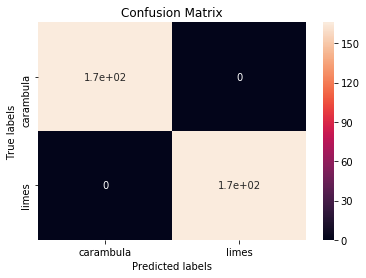

In [77]:
# Матрица ошибок для линейного классификатора
cm = confusion_matrix(y_test, predict)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['carambula', 'limes']); ax.yaxis.set_ticklabels(['carambula', 'limes']);